In [1]:
# Zhipeng Huang's test code file for QM group work

In [1]:

import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

from scipy import stats
from scipy.special import boxcox1p

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [2]:
data = pd.read_csv('data_integrated(Table1-f).csv')

In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 15 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Local authority district code                                      7201 non-null   object 
 1   Local authority district name                                      7201 non-null   object 
 2   Middle super output layer (MSOA) code                              7201 non-null   object 
 3   Middle super output layer (MSOA) name                              7201 non-null   object 
 4   Median energy efficiency score��1a��                               7201 non-null   int64  
 5   Percentage of dwellings with EPC Band 'C' or above(1b)             7201 non-null   float64
 6   Median environmental impact score(1c)                              7201 non-null   int64  
 7   Median estimated Carbon 

In [4]:
data.describe()


,Median energy efficiency score��1a��,Percentage of dwellings with EPC Band 'C' or above(1b),Median environmental impact score(1c),Median estimated Carbon dioxide (CO2) emissions (tonnes/year)(1d),Median estimated energy cost (?/year)(1e)
count,"7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000"
mean,65.1316,38.9470,61.8840,3.5569,779.1680
std,4.7418,13.3904,6.4063,0.9282,171.2165
min,40.0000,3.7600,36.0000,0.5000,273.0000
25%,63.0000,29.4100,58.0000,3.0000,670.0000
50%,65.0000,37.9800,62.0000,3.4000,762.0000
75%,68.0000,47.0500,66.0000,4.0000,871.0000
max,84.0000,96.1300,93.0000,8.6000,"1,657.0000"


In [159]:
data.head(5)

,Local authority district code,Local authority district name,Middle super output layer (MSOA) code,Middle super output layer (MSOA) name,Median energy efficiency score��1a��,Percentage of dwellings with EPC Band 'C' or above(1b),Median environmental impact score(1c),Median estimated Carbon dioxide (CO2) emissions (tonnes/year)(1d),Median estimated energy cost (?/year)(1e),Community heating scheme(1f),Electricity(1f),Heat pump(1f),Mains gas(1f),Oil(1f),Other or unknown(1f)
0,E09000001,City of London,E02000001,City of London 001,72,59.7200,72,2.0000,474,36.77,39.91,2.1,20.99,:,0.23
1,E09000002,Barking and Dagenham,E02000002,Barking and Dagenham 001,66,38.1700,63,3.1000,683,5.27,12.95,0.11,81.39,:,0.28
2,E09000002,Barking and Dagenham,E02000003,Barking and Dagenham 002,63,28.5600,58,3.5000,759,4.47,16.91,:,77.61,:,1.01
3,E09000002,Barking and Dagenham,E02000004,Barking and Dagenham 003,64,31.3500,60,3.5000,778,:,3.38,:,96.37,0.08,0.17
4,E09000002,Barking and Dagenham,E02000005,Barking and Dagenham 004,66,42.4300,62,3.1000,684,1.89,5.08,:,92.94,:,0.09


In [5]:
# keep the raw data the same and use data1
data1=data

In [6]:
# change the last 5 columns' data type from object to float
for i in ['Community heating scheme(1f)','Electricity(1f)','Heat pump(1f)','Mains gas(1f)','Oil(1f)','Other or unknown(1f)']:
    data1[i] = data1[i].str.replace(':','0').astype('float')

In [354]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201 entries, 0 to 7200
Data columns (total 15 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Local authority district code                                      7201 non-null   object 
 1   Local authority district name                                      7201 non-null   object 
 2   Middle super output layer (MSOA) code                              7201 non-null   object 
 3   Middle super output layer (MSOA) name                              7201 non-null   object 
 4   Median energy efficiency score��1a��                               7201 non-null   int64  
 5   Percentage of dwellings with EPC Band 'C' or above(1b)             7201 non-null   float64
 6   Median environmental impact score(1c)                              7201 non-null   int64  
 7   Median estimated Carbon 

In [7]:
data1.describe()

,Median energy efficiency score��1a��,Percentage of dwellings with EPC Band 'C' or above(1b),Median environmental impact score(1c),Median estimated Carbon dioxide (CO2) emissions (tonnes/year)(1d),Median estimated energy cost (?/year)(1e),Community heating scheme(1f),Electricity(1f),Heat pump(1f),Mains gas(1f),Oil(1f),Other or unknown(1f)
count,"7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000","7,201.0000"
mean,65.1316,38.9470,61.8840,3.5569,779.1680,3.2051,10.7447,0.8053,79.9124,3.6729,1.6595
std,4.7418,13.3904,6.4063,0.9282,171.2165,7.1604,9.0192,1.7618,18.7838,10.0439,2.9779
min,40.0000,3.7600,36.0000,0.5000,273.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,63.0000,29.4100,58.0000,3.0000,670.0000,0.0000,4.7800,0.0000,75.5900,0.0000,0.2400
50%,65.0000,37.9800,62.0000,3.4000,762.0000,0.9400,8.4000,0.1300,86.3900,0.0800,0.5200
75%,68.0000,47.0500,66.0000,4.0000,871.0000,3.1200,13.8000,0.7200,91.8800,0.8000,1.6500
max,84.0000,96.1300,93.0000,8.6000,"1,657.0000",85.0500,93.3800,22.2800,99.6400,71.6500,33.2300


In [8]:
# change a column's name because there is a '' in it which is difficult to deal with
data1.rename(columns={"Percentage of dwellings with EPC Band 'C' or above(1b)":"Percentage of dwellings with EPC Band C or above(1b)"},inplace=True)

Text(0.5, 1.0, 'Estimated energy cost')

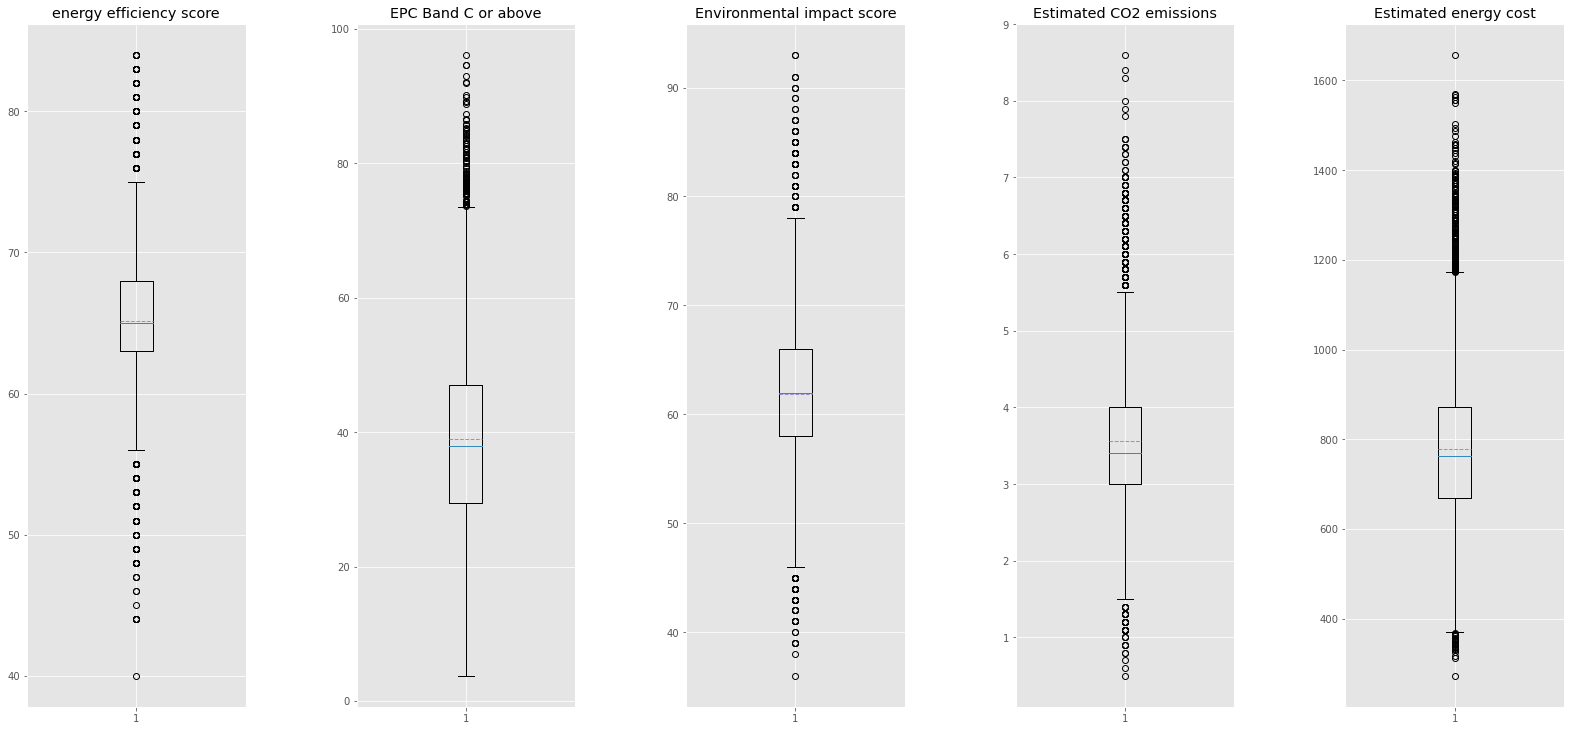

In [9]:
# the boxplots of five "dependent variables"
# basically they are normally distributed

fig1, axs1 = plt.subplots(1, 5,figsize=(24,12))
fig1.tight_layout(pad=8)

axs1[0].boxplot(data1['Median energy efficiency score��1a��'],meanline=True,showmeans=True)
axs1[0].set_title('energy efficiency score')

axs1[1].boxplot(data1['Percentage of dwellings with EPC Band C or above(1b)'],meanline=True,showmeans=True)
axs1[1].set_title('EPC Band C or above')

axs1[2].boxplot(data1['Median environmental impact score(1c)'],meanline=True,showmeans=True)
axs1[2].set_title('Environmental impact score')

axs1[3].boxplot(data1['Median estimated Carbon dioxide (CO2) emissions (tonnes/year)(1d)'],meanline=True,showmeans=True)
axs1[3].set_title('Estimated CO2 emissions')

axs1[4].boxplot(data1['Median estimated energy cost (?/year)(1e)'],meanline=True,showmeans=True)
axs1[4].set_title('Estimated energy cost')



Text(0.5, 1.0, 'Other or unknown')

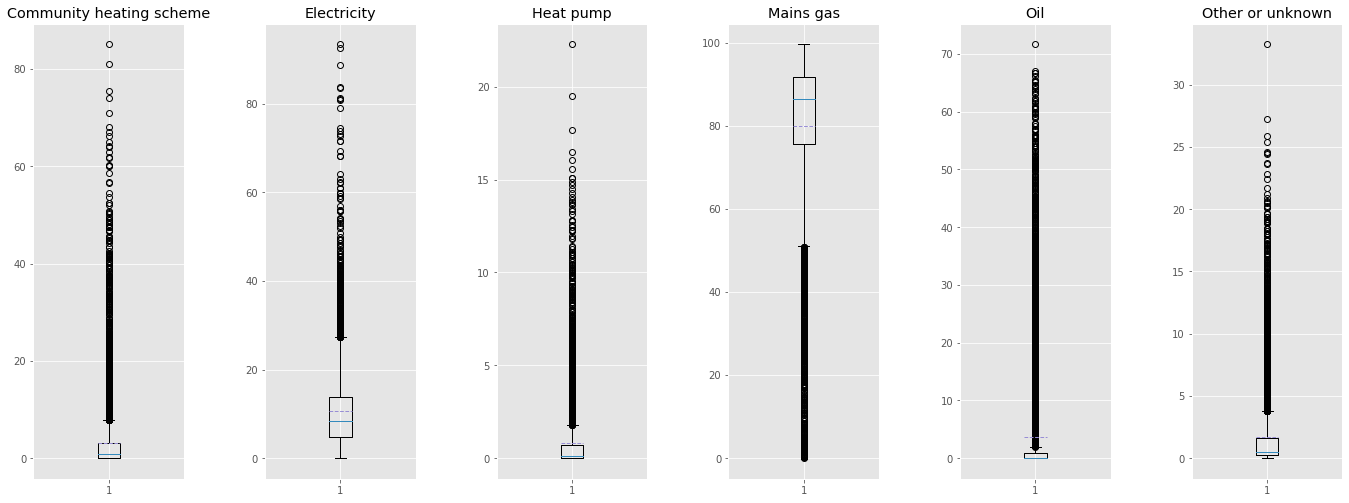

In [10]:
# the boxplots of six "independent variables"
# basically they are highly skewed

fig2, axs2 = plt.subplots(1,6,figsize=(20,8))
fig2.tight_layout(pad=5)

# basic plot
axs2[0].boxplot(data1['Community heating scheme(1f)'],meanline=True,showmeans=True)
axs2[0].set_title('Community heating scheme')



axs2[1].boxplot(data1['Electricity(1f)'],meanline=True,showmeans=True)
axs2[1].set_title('Electricity')

axs2[2].boxplot(data1['Heat pump(1f)'],meanline=True,showmeans=True)
axs2[2].set_title('Heat pump')

axs2[3].boxplot(data1['Mains gas(1f)'],meanline=True,showmeans=True)
axs2[3].set_title('Mains gas')

axs2[4].boxplot(data1['Oil(1f)'],meanline=True,showmeans=True)
axs2[4].set_title('Oil')

axs2[5].boxplot(data1['Other or unknown(1f)'],meanline=True,showmeans=True)
axs2[5].set_title('Other or unknown')

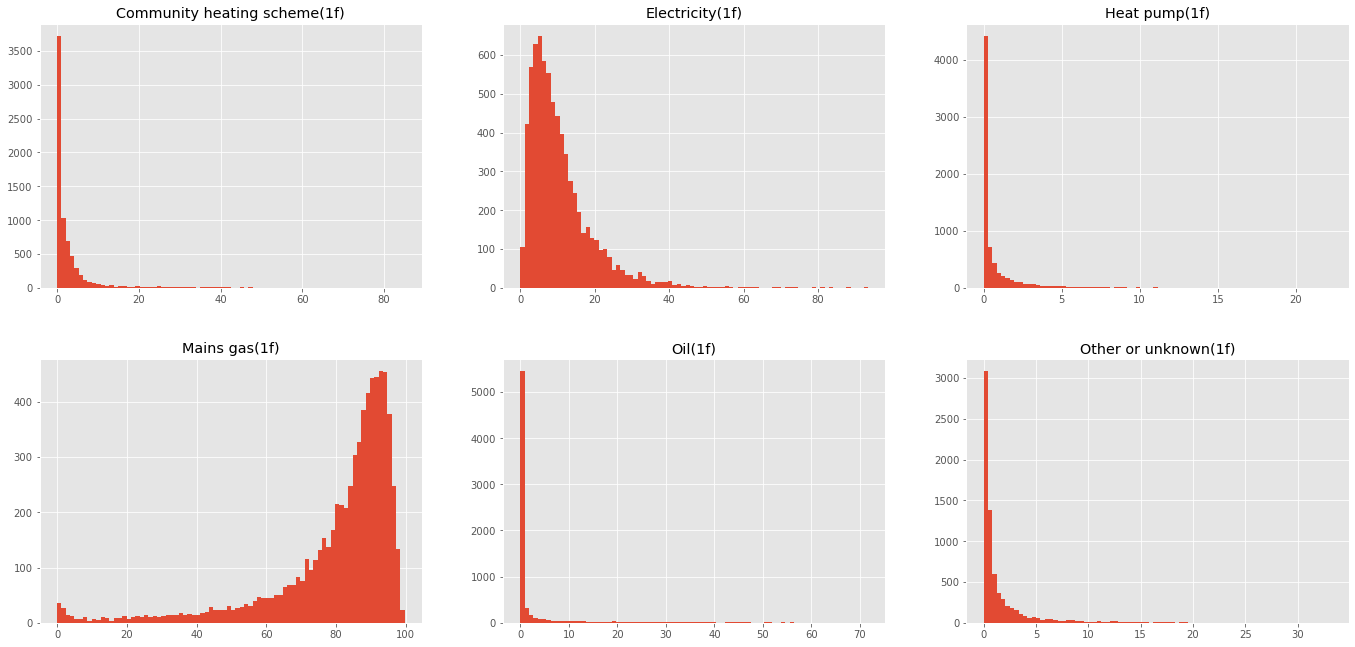

In [11]:
# here are the distributions of the 6 types of fuel of heating
# they are highly right skewed except Main gas(left skewed)

fig3, axs3 = plt.subplots(2, 3,figsize=(20,10))
fig3.tight_layout(pad=5)

list=['Community heating scheme(1f)','Electricity(1f)','Heat pump(1f)','Mains gas(1f)','Oil(1f)','Other or unknown(1f)']

for i in range(2):
    for j in range(3):
        axs3[i,j].hist(data1[list[j+3*i]],bins=80)
        axs3[i,j].set_title(list[j+3*i])
    


In [12]:
# data transformation
# for the 5 variables except Main gas, use cube square root to transform

list2 = ['Community heating scheme(1f)','Electricity(1f)','Heat pump(1f)','Oil(1f)','Other or unknown(1f)']
for i in range(5):
   data1[list2[i] + '_cbrt'] = np.cbrt(data1[list2[i]]) 

In [13]:
# data transformation
# for Main gas, use square to transform

data1['Mains gas(1f)_squ']=data1['Mains gas(1f)']**2

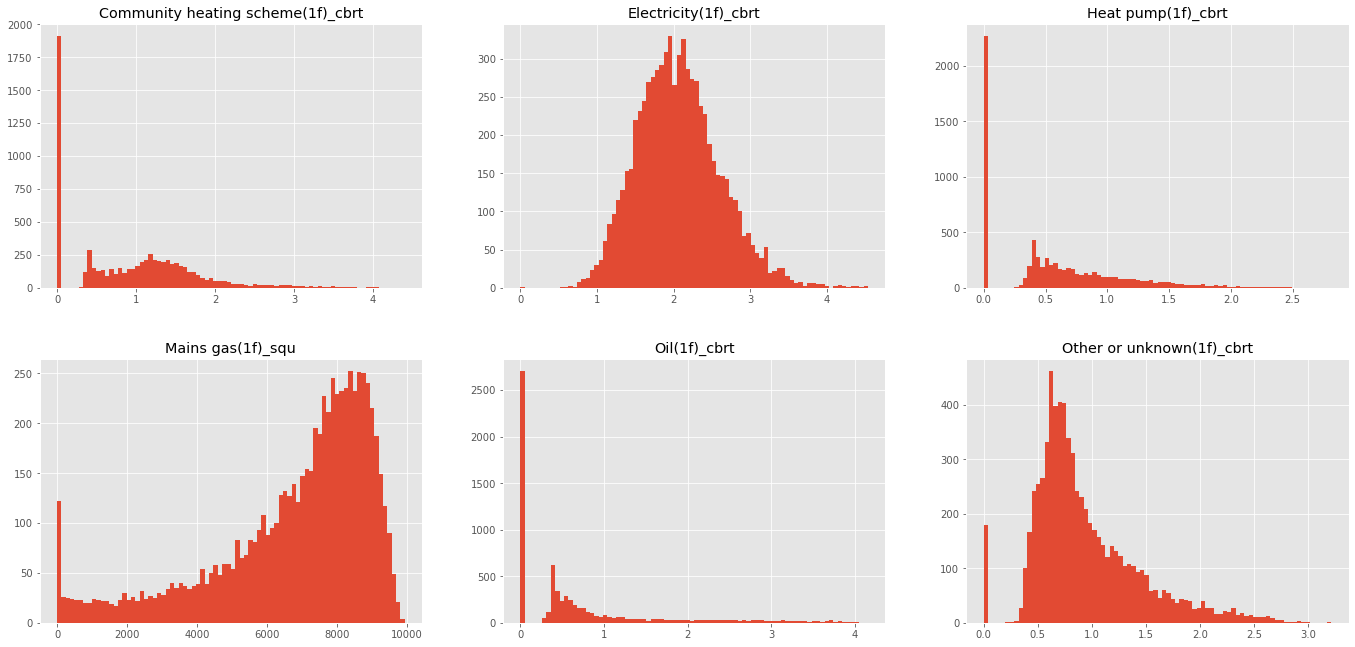

In [14]:
fig4, axs4 = plt.subplots(2, 3,figsize=(20,10))
fig4.tight_layout(pad=5)
list=['Community heating scheme(1f)_cbrt','Electricity(1f)_cbrt','Heat pump(1f)_cbrt','Mains gas(1f)_squ','Oil(1f)_cbrt','Other or unknown(1f)_cbrt']
for i in range(2):
    for j in range(3):
        axs4[i,j].hist(data1[list[j+3*i]],bins=80)
        axs4[i,j].set_title(list[j+3*i])

# it can be seen from the data distribution that, because of too many zeros, the distributions of community heating scheme, heat pump and Oil are even worse than before 
# although electricity and Other or unknown are better than before


In [16]:
data1.head()

,Local authority district code,Local authority district name,Middle super output layer (MSOA) code,Middle super output layer (MSOA) name,Median energy efficiency score��1a��,Percentage of dwellings with EPC Band C or above(1b),Median environmental impact score(1c),Median estimated Carbon dioxide (CO2) emissions (tonnes/year)(1d),Median estimated energy cost (?/year)(1e),Community heating scheme(1f),...,Heat pump(1f),Mains gas(1f),Oil(1f),Other or unknown(1f),Community heating scheme(1f)_cbrt,Electricity(1f)_cbrt,Heat pump(1f)_cbrt,Oil(1f)_cbrt,Other or unknown(1f)_cbrt,Mains gas(1f)_squ
0,E09000001,City of London,E02000001,City of London 001,72,59.7200,72,2.0000,474,36.7700,...,2.1000,20.9900,0.0000,0.2300,3.3253,3.4174,1.2806,0.0000,0.6127,440.5801
1,E09000002,Barking and Dagenham,E02000002,Barking and Dagenham 001,66,38.1700,63,3.1000,683,5.2700,...,0.1100,81.3900,0.0000,0.2800,1.7402,2.3483,0.4791,0.0000,0.6542,"6,624.3321"
2,E09000002,Barking and Dagenham,E02000003,Barking and Dagenham 002,63,28.5600,58,3.5000,759,4.4700,...,0.0000,77.6100,0.0000,1.0100,1.6473,2.5667,0.0000,0.0000,1.0033,"6,023.3121"
3,E09000002,Barking and Dagenham,E02000004,Barking and Dagenham 003,64,31.3500,60,3.5000,778,0.0000,...,0.0000,96.3700,0.0800,0.1700,0.0000,1.5007,0.0000,0.4309,0.5540,"9,287.1769"
4,E09000002,Barking and Dagenham,E02000005,Barking and Dagenham 004,66,42.4300,62,3.1000,684,1.8900,...,0.0000,92.9400,0.0000,0.0900,1.2364,1.7190,0.0000,0.0000,0.4481,"8,637.8436"


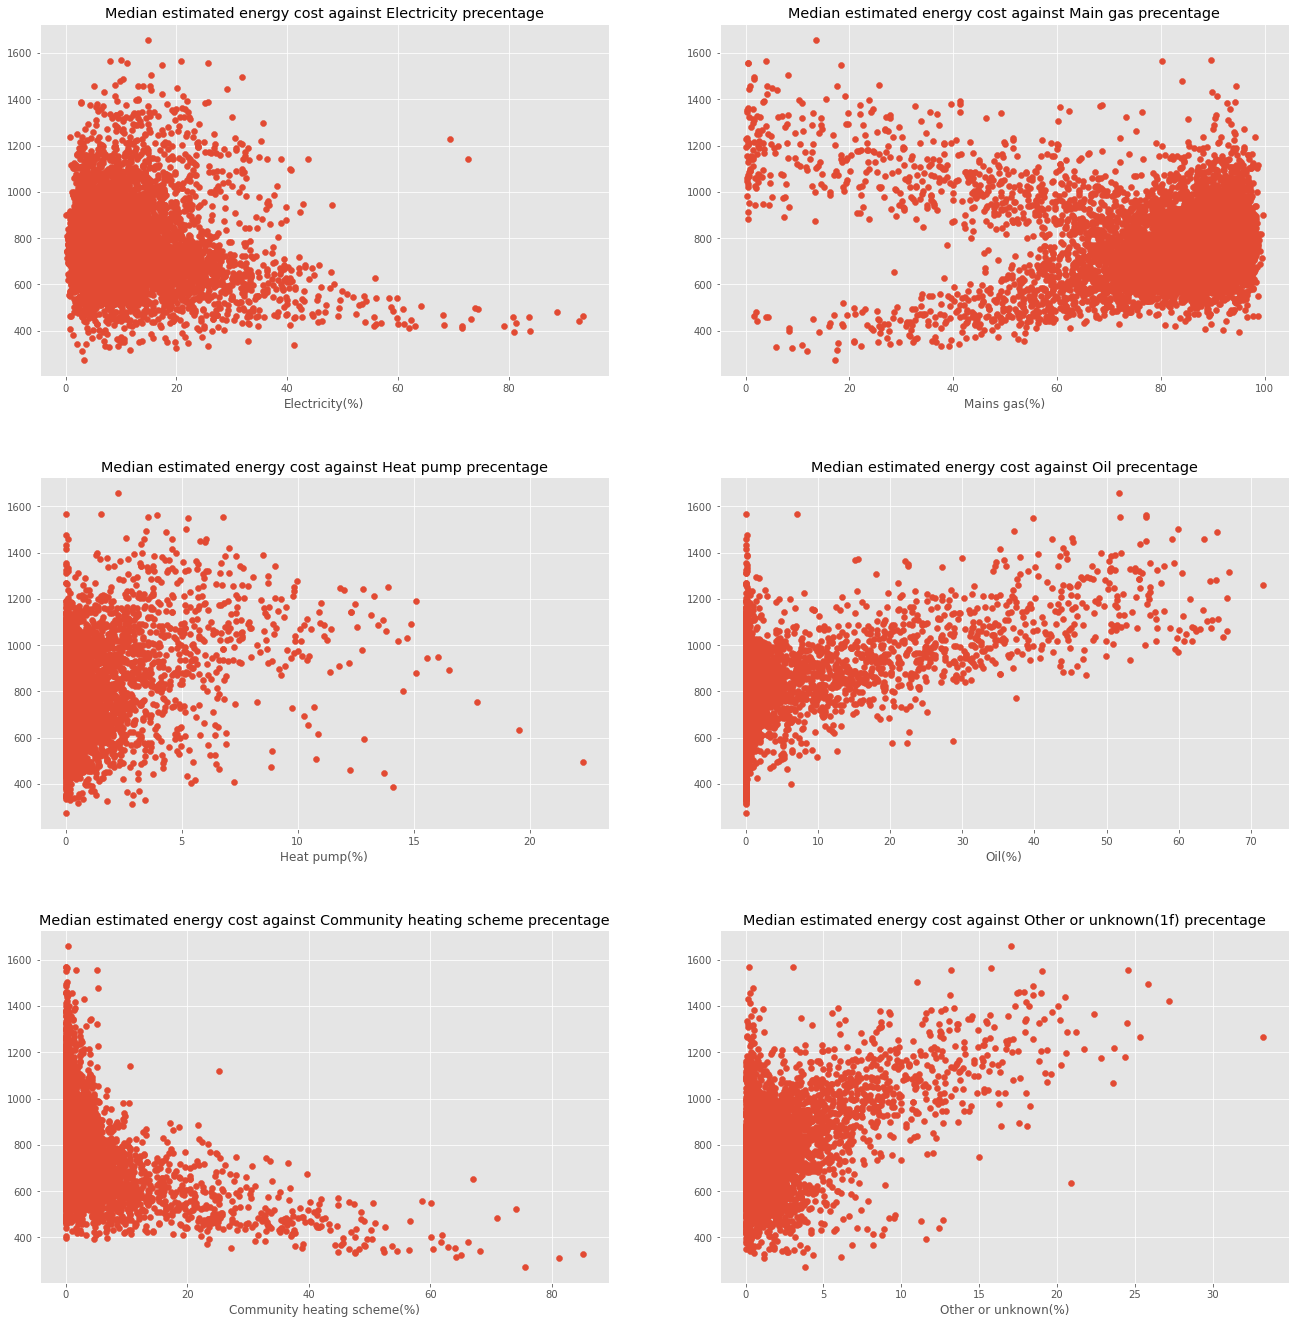

In [20]:
# Before doing the multiple regression, check the relationship between the y and each x
# first, use the data without transforming

# can be seen that slight linear relationship exist in all of them but the points gathering at zero really affect the linear trend
# So as the distribution plots show above, too many zero influences a lot

fig, ax = plt.subplots(3, 2, figsize=(20,20))
fig.tight_layout(pad=8)

ax[0,0].scatter(data1['Electricity(1f)'], data1['Median estimated energy cost (?/year)(1e)'])
ax[0,0].set(title='Median estimated energy cost against Electricity precentage',
      xlabel='Electricity(%)')

ax[0,1].scatter(data1['Mains gas(1f)'], data1['Median estimated energy cost (?/year)(1e)'])
ax[0,1].set(title='Median estimated energy cost against Main gas precentage',
      xlabel='Mains gas(%)')

ax[1,0].scatter(data1['Heat pump(1f)'], data1['Median estimated energy cost (?/year)(1e)'])
ax[1,0].set(title='Median estimated energy cost against Heat pump precentage',
      xlabel='Heat pump(%)')

ax[1,1].scatter(data1['Oil(1f)'], data1['Median estimated energy cost (?/year)(1e)'])
ax[1,1].set(title='Median estimated energy cost against Oil precentage',
      xlabel='Oil(%)')

ax[2,0].scatter(data1['Community heating scheme(1f)'], data1['Median estimated energy cost (?/year)(1e)'])
ax[2,0].set(title='Median estimated energy cost against Community heating scheme precentage',
      xlabel='Community heating scheme(%)')

ax[2,1].scatter(data1['Other or unknown(1f)'], data1['Median estimated energy cost (?/year)(1e)'])
ax[2,1].set(title='Median estimated energy cost against Other or unknown(1f) precentage',
      xlabel='Other or unknown(%)')

plt.show()



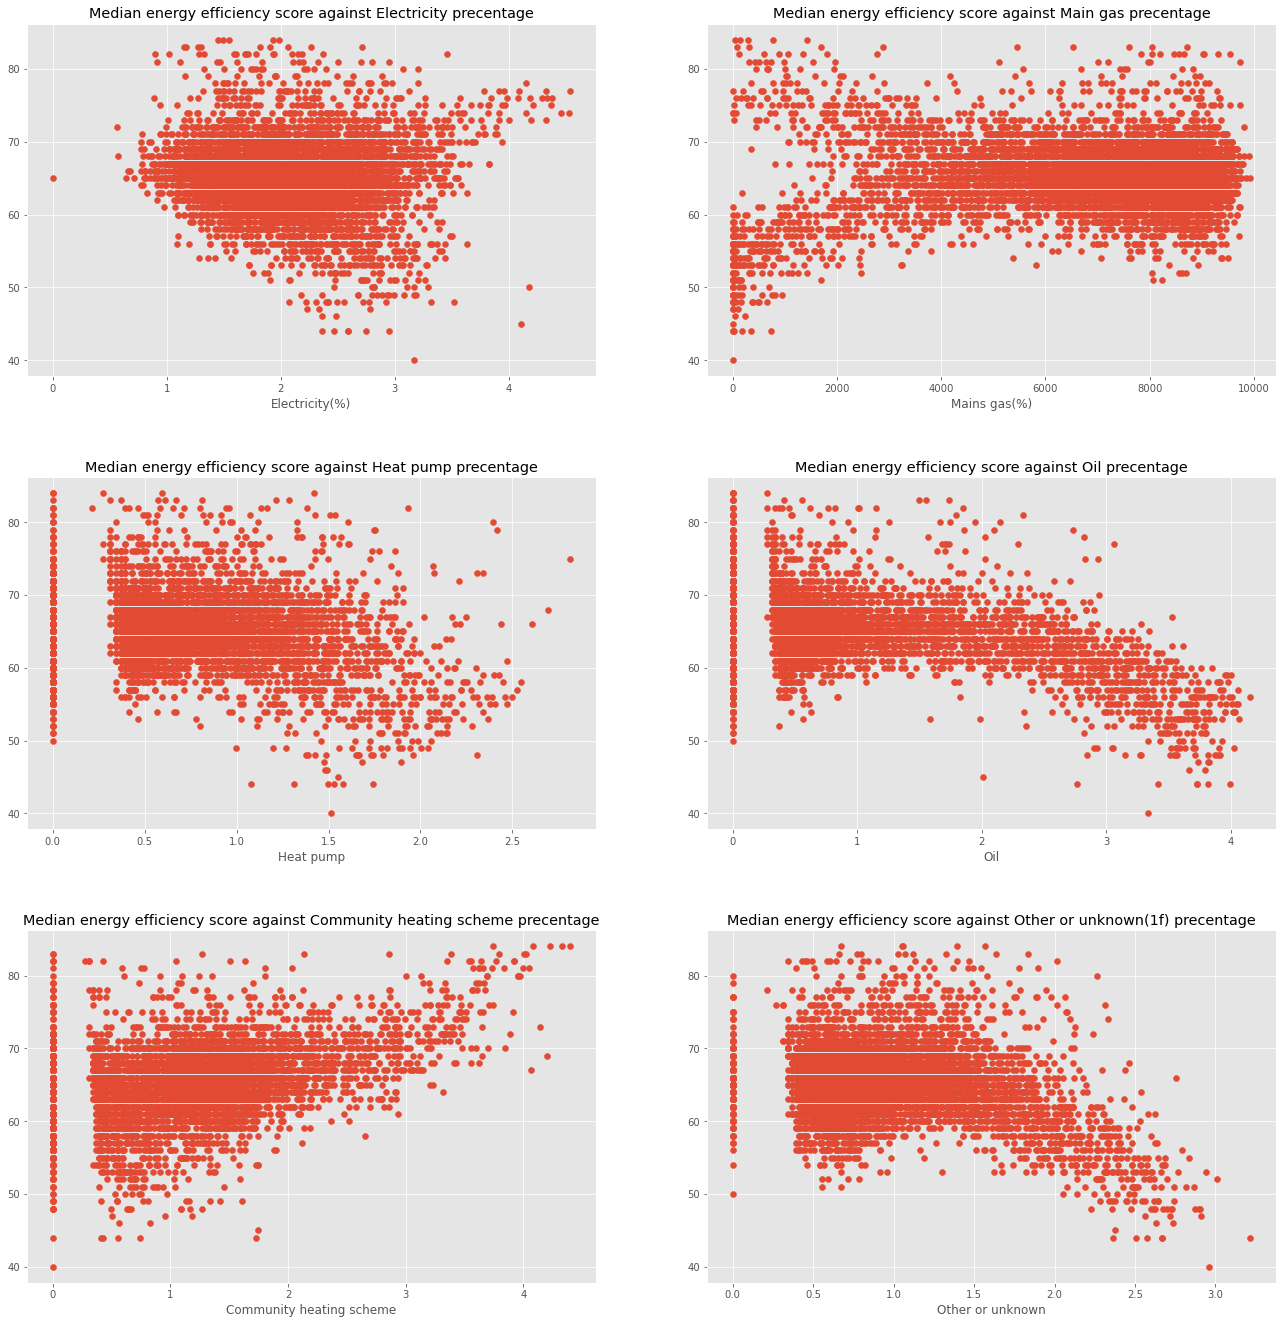

In [15]:
# Then use the variables with transforming 
# can be seen that the linear relationships are even worse than the variables without any transforming 

fig5, ax5 = plt.subplots(3, 2, figsize=(20,20))
fig5.tight_layout(pad=8)

ax5[0,0].scatter(data1['Electricity(1f)_cbrt'], data1['Median energy efficiency score��1a��'])
ax5[0,0].set(title='Median energy efficiency score against Electricity precentage',
      xlabel='Electricity(%)')

ax5[0,1].scatter(data1['Mains gas(1f)_squ'], data1['Median energy efficiency score��1a��'])
ax5[0,1].set(title='Median energy efficiency score against Main gas precentage',
      xlabel='Mains gas(%)')

ax5[1,0].scatter(data1['Heat pump(1f)_cbrt'], data1['Median energy efficiency score��1a��'])
ax5[1,0].set(title='Median energy efficiency score against Heat pump precentage',
      xlabel='Heat pump')

ax5[1,1].scatter(data1['Oil(1f)_cbrt'], data1['Median energy efficiency score��1a��'])
ax5[1,1].set(title='Median energy efficiency score against Oil precentage',
      xlabel='Oil')

ax5[2,0].scatter(data1['Community heating scheme(1f)_cbrt'], data1['Median energy efficiency score��1a��'])
ax5[2,0].set(title='Median energy efficiency score against Community heating scheme precentage',
      xlabel='Community heating scheme')

ax5[2,1].scatter(data1['Other or unknown(1f)_cbrt'], data1['Median energy efficiency score��1a��'])
ax5[2,1].set(title='Median energy efficiency score against Other or unknown(1f) precentage',
      xlabel='Other or unknown')

plt.show()



In [103]:
# now do the multiple regression using the variables with and without transforming

In [22]:
# first use the original independent variables

Y = data1["Median estimated energy cost (?/year)(1e)"]
X = data1.loc[:,['Community heating scheme(1f)','Electricity(1f)','Heat pump(1f)','Mains gas(1f)','Oil(1f)','Other or unknown(1f)']]

In [23]:
X

,Community heating scheme(1f),Electricity(1f),Heat pump(1f),Mains gas(1f),Oil(1f),Other or unknown(1f)
0,36.7700,39.9100,2.1000,20.9900,0.0000,0.2300
1,5.2700,12.9500,0.1100,81.3900,0.0000,0.2800
2,4.4700,16.9100,0.0000,77.6100,0.0000,1.0100
3,0.0000,3.3800,0.0000,96.3700,0.0800,0.1700
4,1.8900,5.0800,0.0000,92.9400,0.0000,0.0900
...,...,...,...,...,...,...
7196,0.0000,4.2700,0.2400,94.9000,0.0800,0.5100
7197,0.0500,6.1000,0.6400,76.1800,11.5200,5.5100
7198,0.4300,20.3400,6.4600,11.0700,46.0100,15.6800
7199,4.6100,79.0700,0.0500,16.1500,0.0000,0.1200


In [24]:
# do the regression, first, if add a constant

X=sm.add_constant(X)

model_0=sm.OLS(Y,X).fit()

model_0.summary()

# all the P values (P>|t|) are too large, so need to remove the multicollinearity

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Median estimated energy cost (?/year)(1e)   R-squared:                       0.465
Model:                                                   OLS   Adj. R-squared:                  0.465
Method:                                        Least Squares   F-statistic:                     1044.
Date:                                       Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                                               15:24:16   Log-Likelihood:                -44997.
No. Observations:                                       7201   AIC:                         9.001e+04
Df Residuals:                                           7194   BIC:                         9.006e+04
Df Model:                                                  6                                         
Covariance Type:                                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1.515e+04   2.23e+04     -0.679      0.497   -5.89e+04    2.86e+04
Community heating scheme(1f)   151.8173    223.202      0.680      0.496    -285.724     589.359
Electricity(1f)                155.8353    223.199      0.698      0.485    -281.701     593.372
Heat pump(1f)                  153.8693    223.185      0.689      0.491    -283.639     591.378
Mains gas(1f)                  159.5726    223.200      0.715      0.475    -277.966     597.111
Oil(1f)                        167.5815    223.201      0.751      0.453    -269.959     605.122
Other or unknown(1f)           167.2042    223.200      0.749      0.454    -270.334     604.743
==============================================================================
Omnibus:                      867.495   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1863.928
Skew:                           0.739   Prob(JB):                         0.00
Kurtosis:                       5.006   Cond. No.                     1.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# if don not add a constant

Y = data1["Median estimated energy cost (?/year)(1e)"]
X = data1.loc[:,['Community heating scheme(1f)','Electricity(1f)','Heat pump(1f)','Mains gas(1f)','Oil(1f)','Other or unknown(1f)']]


In [52]:
# X=sm.add_constant(X)

model_1=sm.OLS(Y,X).fit()

model_1.summary()

# the R square is much higher than before and the P values are also good. why???

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Median estimated energy cost (?/year)(1e)   R-squared (uncentered):                   0.975
Model:                                                   OLS   Adj. R-squared (uncentered):              0.975
Method:                                        Least Squares   F-statistic:                          4.750e+04
Date:                                       Tue, 07 Dec 2021   Prob (F-statistic):                        0.00
Time:                                               16:03:13   Log-Likelihood:                         -44997.
No. Observations:                                       7201   AIC:                                  9.001e+04
Df Residuals:                                           7195   BIC:                                  9.005e+04
Df Model:                                                  6                                                  
Covariance Type:                                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Community heating scheme(1f)     0.3105      0.207      1.499      0.134      -0.095       0.716
Electricity(1f)                  4.3302      0.153     28.344      0.000       4.031       4.630
Heat pump(1f)                    2.3761      1.207      1.969      0.049       0.010       4.742
Mains gas(1f)                    8.0668      0.025    329.242      0.000       8.019       8.115
Oil(1f)                         16.0752      0.288     55.832      0.000      15.511      16.640
Other or unknown(1f)            15.6994      0.800     19.627      0.000      14.131      17.267
==============================================================================
Omnibus:                      867.147   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1861.139
Skew:                           0.739   Prob(JB):                         0.00
Kurtosis:                       5.004   Cond. No.                         68.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

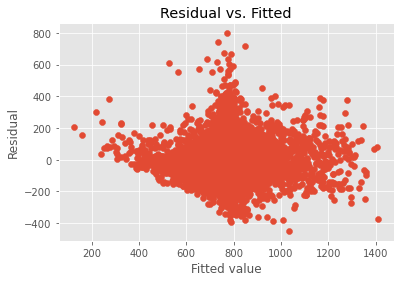

In [27]:
# check the residual
# residual plot 
plt.scatter(model_1.fittedvalues, model_1.resid)
# adding title and labels
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted')
plt.show()

# not very bad ? seems no need to data transforming?

In [405]:
# ignore this code cell
# select the columns needed after data transformation
# data_select=data1[['Median energy efficiency score��1a��','Percentage of dwellings with EPC Band C or above(1b)','Median environmental impact score(1c)','Median estimated Carbon dioxide (CO2) emissions (tonnes/year)(1d)','Median estimated energy cost (?/year)(1e)','Community heating scheme(1f)_cbrt','Electricity_cbrt','Heat pump(1f)_cbrt','Mains gas(1f)','Oil(1f)_cbrt','Other or unknown(1f)_cbrt']]

Text(0.5, 1.0, 'Correlation Matrix')

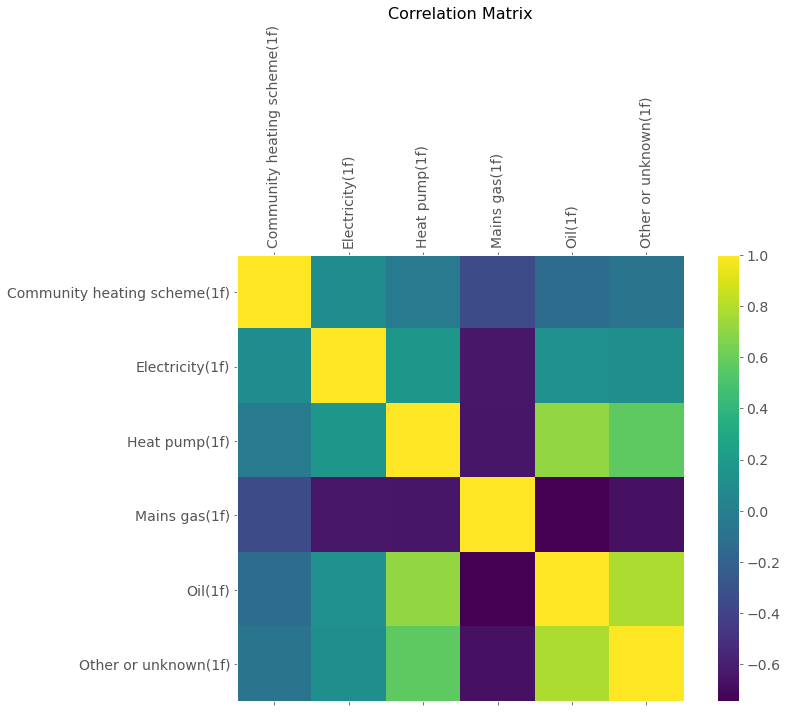

In [28]:
# now do the regression with VIF since the model_0's issue
# first do a correlation matrix for X
X = data1.loc[:,['Community heating scheme(1f)','Electricity(1f)','Heat pump(1f)','Mains gas(1f)','Oil(1f)','Other or unknown(1f)']]
df = X
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(12, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [29]:
# now do VIF for X

# here using the VIF to avoid potential Multicollinearity
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [30]:
# do the VIF
X_drop = drop_column_using_vif_(X)

Dropping: Mains gas(1f)


In [31]:
# now do the regression again without Main gas, first add a constant
Y1 = data1["Median estimated energy cost (?/year)(1e)"]
X2 = data1.loc[:,['Community heating scheme(1f)','Electricity(1f)','Heat pump(1f)','Oil(1f)','Other or unknown(1f)']]

In [32]:
X2 = sm.add_constant(X2)

model_2=sm.OLS(Y1,X2).fit()

model_2.summary()

# R square is similar to model_0, but the P values are better

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Median estimated energy cost (?/year)(1e)   R-squared:                       0.465
Model:                                                   OLS   Adj. R-squared:                  0.465
Method:                                        Least Squares   F-statistic:                     1252.
Date:                                       Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                                               15:25:12   Log-Likelihood:                -44997.
No. Observations:                                       7201   AIC:                         9.001e+04
Df Residuals:                                           7195   BIC:                         9.005e+04
Df Model:                                                  5                                         
Covariance Type:                                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          806.6779      2.450    329.241      0.000     801.875     811.481
Community heating scheme(1f)    -7.7563      0.211    -36.847      0.000      -8.169      -7.344
Electricity(1f)                 -3.7365      0.167    -22.314      0.000      -4.065      -3.408
Heat pump(1f)                   -5.6900      1.208     -4.709      0.000      -8.059      -3.321
Oil(1f)                          8.0083      0.284     28.194      0.000       7.452       8.565
Other or unknown(1f)             7.6327      0.805      9.478      0.000       6.054       9.211
==============================================================================
Omnibus:                      867.122   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1860.968
Skew:                           0.739   Prob(JB):                         0.00
Kurtosis:                       5.004   Cond. No.                         25.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

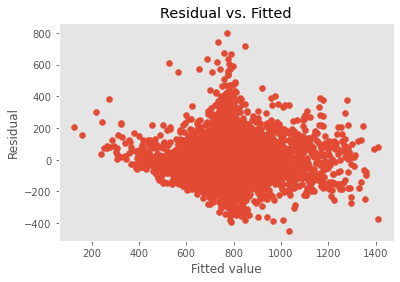

In [33]:
# for residual plot 
plt.scatter(model_2.fittedvalues, model_2.resid)
# adding title and labels
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted')
plt.show()

# very similar to model_1

In [53]:
# if do not add constant
Y1 = data1["Median estimated energy cost (?/year)(1e)"]
X2 = data1.loc[:,['Community heating scheme(1f)','Electricity(1f)','Heat pump(1f)','Oil(1f)','Other or unknown(1f)']]

#X2 = sm.add_constant(X2)

model_3=sm.OLS(Y1,X2).fit()

model_3.summary()

# R square is larger than model_2, P values are good

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Median estimated energy cost (?/year)(1e)   R-squared (uncentered):                   0.604
Model:                                                   OLS   Adj. R-squared (uncentered):              0.604
Method:                                        Least Squares   F-statistic:                              2198.
Date:                                       Tue, 07 Dec 2021   Prob (F-statistic):                        0.00
Time:                                               16:04:11   Log-Likelihood:                         -54995.
No. Observations:                                       7201   AIC:                                  1.100e+05
Df Residuals:                                           7196   BIC:                                  1.100e+05
Df Model:                                                  5                                                  
Covariance Type:                                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Community heating scheme(1f)     5.8639      0.827      7.088      0.000       4.242       7.485
Electricity(1f)                 31.8784      0.512     62.225      0.000      30.874      32.883
Heat pump(1f)                   24.0320      4.830      4.976      0.000      14.565      33.499
Oil(1f)                         -2.8571      1.131     -2.527      0.012      -5.074      -0.641
Other or unknown(1f)            70.0744      3.137     22.340      0.000      63.925      76.223
==============================================================================
Omnibus:                     2651.855   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12487.802
Skew:                          -1.737   Prob(JB):                         0.00
Kurtosis:                       8.437   Cond. No.                         12.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

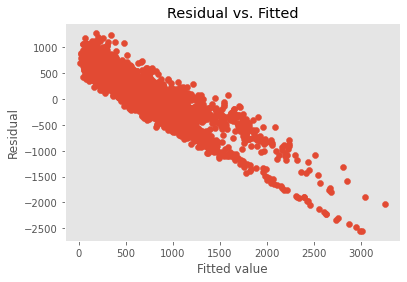

In [35]:
# for residual

plt.scatter(model_3.fittedvalues, model_3.resid)
# adding title and labels
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted')
plt.show()

# very strange

In [54]:
# what have done above is using the original data
# now use the data with transforming at the beginning

# if  add constant
Y1 = data1["Median estimated energy cost (?/year)(1e)"]
X3 = data1.loc[:,['Community heating scheme(1f)_cbrt','Electricity(1f)_cbrt','Mains gas(1f)_squ','Heat pump(1f)_cbrt','Oil(1f)_cbrt','Other or unknown(1f)_cbrt']]


In [100]:
X3

,Community heating scheme(1f)_cbrt,Electricity(1f)_cbrt,Mains gas(1f)_squ,Heat pump(1f)_cbrt,Oil(1f)_cbrt,Other or unknown(1f)_cbrt
0,3.3253,3.4174,440.5801,1.2806,0.0000,0.6127
1,1.7402,2.3483,"6,624.3321",0.4791,0.0000,0.6542
2,1.6473,2.5667,"6,023.3121",0.0000,0.0000,1.0033
3,0.0000,1.5007,"9,287.1769",0.0000,0.4309,0.5540
4,1.2364,1.7190,"8,637.8436",0.0000,0.0000,0.4481
...,...,...,...,...,...,...
7196,0.0000,1.6223,"9,006.0100",0.6214,0.4309,0.7990
7197,0.3684,1.8272,"5,803.3924",0.8618,2.2585,1.7662
7198,0.7548,2.7297,122.5449,1.8624,3.5833,2.5029
7199,1.6643,4.2921,260.8225,0.3684,0.0000,0.4932


In [55]:
# first add a constant
X3 = sm.add_constant(X3)

model_4=sm.OLS(Y1,X3).fit()

model_4.summary()

# R square is smaller than before, some P values are not good

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Median estimated energy cost (?/year)(1e)   R-squared:                       0.398
Model:                                                   OLS   Adj. R-squared:                  0.398
Method:                                        Least Squares   F-statistic:                     794.1
Date:                                       Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                                               16:04:57   Log-Likelihood:                -45422.
No. Observations:                                       7201   AIC:                         9.086e+04
Df Residuals:                                           7194   BIC:                         9.091e+04
Df Model:                                                  6                                         
Covariance Type:                                   nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               800.2520     28.765     27.820      0.000     743.864     856.640
Community heating scheme(1f)_cbrt   -55.1361      2.877    -19.165      0.000     -60.776     -49.496
Electricity(1f)_cbrt                -22.6330      5.492     -4.121      0.000     -33.398     -11.868
Mains gas(1f)_squ                     0.0022      0.002      1.142      0.254      -0.002       0.006
Heat pump(1f)_cbrt                  -12.8777      4.229     -3.045      0.002     -21.168      -4.588
Oil(1f)_cbrt                         96.9185      3.531     27.452      0.000      89.998     103.839
Other or unknown(1f)_cbrt             0.6123      5.253      0.117      0.907      -9.685      10.910
==============================================================================
Omnibus:                      755.957   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1505.159
Skew:                           0.681   Prob(JB):                         0.00
Kurtosis:                       4.778   Cond. No.                     1.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# if do not add a constant

Y1 = data1["Median estimated energy cost (?/year)(1e)"]
X3 = data1.loc[:,['Community heating scheme(1f)_cbrt','Electricity(1f)_cbrt','Mains gas(1f)_squ','Heat pump(1f)_cbrt','Oil(1f)_cbrt','Other or unknown(1f)_cbrt']]

#X3 = sm.add_constant(X3)

model_5=sm.OLS(Y1,X3).fit()

model_5.summary()

# R square is suddenly much higher but a little smaller than model_1, one P values is not good

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Median estimated energy cost (?/year)(1e)   R-squared (uncentered):                   0.969
Model:                                                   OLS   Adj. R-squared (uncentered):              0.969
Method:                                        Least Squares   F-statistic:                          3.788e+04
Date:                                       Tue, 07 Dec 2021   Prob (F-statistic):                        0.00
Time:                                               16:05:56   Log-Likelihood:                         -45790.
No. Observations:                                       7201   AIC:                                  9.159e+04
Df Residuals:                                           7195   BIC:                                  9.163e+04
Df Model:                                                  6                                                  
Covariance Type:                                   nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Community heating scheme(1f)_cbrt    -0.2743      2.204     -0.124      0.901      -4.596       4.047
Electricity(1f)_cbrt                117.5688      2.296     51.208      0.000     113.068     122.069
Mains gas(1f)_squ                     0.0542      0.000    110.621      0.000       0.053       0.055
Heat pump(1f)_cbrt                    9.6520      4.368      2.210      0.027       1.089      18.215
Oil(1f)_cbrt                        139.1126      3.355     41.464      0.000     132.536     145.689
Other or unknown(1f)_cbrt            65.4602      4.954     13.214      0.000      55.749      75.171
==============================================================================
Omnibus:                      648.930   Durbin-Watson:                   1.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1202.288
Skew:                           0.622   Prob(JB):                    8.44e-262
Kurtosis:                       4.568   Cond. No.                     2.45e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

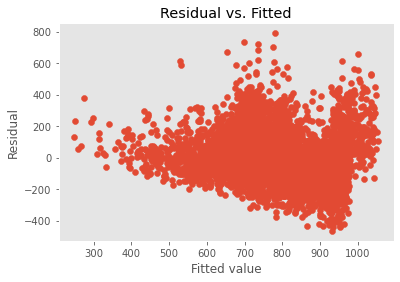

In [40]:
# for residual

plt.scatter(model_5.fittedvalues, model_5.resid)
# adding title and labels
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted')
plt.show()

# not good

In [41]:
# now if do the VIF
Y1 = data1["Median estimated energy cost (?/year)(1e)"]
X3 = data1.loc[:,['Community heating scheme(1f)_cbrt','Electricity(1f)_cbrt','Mains gas(1f)_squ','Heat pump(1f)_cbrt','Oil(1f)_cbrt','Other or unknown(1f)_cbrt']]

X3_drop = drop_column_using_vif_(X3)

Dropping: Mains gas(1f)_squ


In [58]:
# again
# if  add a constant

Y1 = data1["Median estimated energy cost (?/year)(1e)"]
X3 = data1.loc[:,['Community heating scheme(1f)_cbrt','Electricity(1f)_cbrt','Heat pump(1f)_cbrt','Oil(1f)_cbrt','Other or unknown(1f)_cbrt']]

X3 = sm.add_constant(X3)

model_6=sm.OLS(Y1,X3).fit()

model_6.summary()

# R square is the same as model_4, one P values is not good

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Median estimated energy cost (?/year)(1e)   R-squared:                       0.398
Model:                                                   OLS   Adj. R-squared:                  0.398
Method:                                        Least Squares   F-statistic:                     952.6
Date:                                       Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                                               16:06:09   Log-Likelihood:                -45422.
No. Observations:                                       7201   AIC:                         9.086e+04
Df Residuals:                                           7195   BIC:                         9.090e+04
Df Model:                                                  5                                         
Covariance Type:                                   nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               832.1189      6.953    119.682      0.000     818.489     845.748
Community heating scheme(1f)_cbrt   -57.4105      2.076    -27.659      0.000     -61.479     -53.342
Electricity(1f)_cbrt                -27.8892      2.994     -9.316      0.000     -33.757     -22.021
Heat pump(1f)_cbrt                  -13.8405      4.144     -3.340      0.001     -21.964      -5.717
Oil(1f)_cbrt                         94.9626      3.087     30.762      0.000      88.911     101.014
Other or unknown(1f)_cbrt            -1.5240      4.909     -0.310      0.756     -11.146       8.098
==============================================================================
Omnibus:                      750.620   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1489.561
Skew:                           0.678   Prob(JB):                         0.00
Kurtosis:                       4.768   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# again
# if  not add a constant

Y1 = data1["Median estimated energy cost (?/year)(1e)"]
X3 = data1.loc[:,['Community heating scheme(1f)_cbrt','Electricity(1f)_cbrt','Heat pump(1f)_cbrt','Oil(1f)_cbrt','Other or unknown(1f)_cbrt']]

# X3 = sm.add_constant(X3)

model_7=sm.OLS(Y1,X3).fit()

model_7.summary()

# R square is suddenly much higher, P values are  good

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Median estimated energy cost (?/year)(1e)   R-squared (uncentered):                   0.917
Model:                                                   OLS   Adj. R-squared (uncentered):              0.917
Method:                                        Least Squares   F-statistic:                          1.593e+04
Date:                                       Tue, 07 Dec 2021   Prob (F-statistic):                        0.00
Time:                                               15:30:53   Log-Likelihood:                         -49367.
No. Observations:                                       7201   AIC:                                  9.874e+04
Df Residuals:                                           7196   BIC:                                  9.878e+04
Df Model:                                                  5                                                  
Covariance Type:                                   nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Community heating scheme(1f)_cbrt   -38.1459      3.579    -10.659      0.000     -45.161     -31.131
Electricity(1f)_cbrt                255.4200      3.169     80.605      0.000     249.208     261.632
Heat pump(1f)_cbrt                  -18.0368      7.166     -2.517      0.012     -32.085      -3.989
Oil(1f)_cbrt                         22.8058      5.236      4.356      0.000      12.543      33.069
Other or unknown(1f)_cbrt           253.6227      7.646     33.171      0.000     238.634     268.611
==============================================================================
Omnibus:                      148.566   Durbin-Watson:                   1.381
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.387
Skew:                          -0.225   Prob(JB):                     1.39e-48
Kurtosis:                       3.730   Cond. No.                         9.02
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

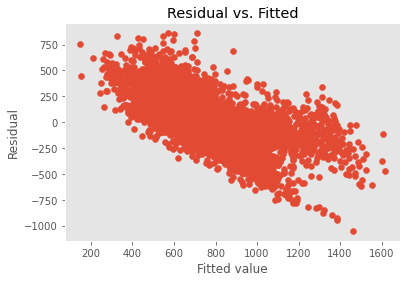

In [45]:
# for residual

plt.scatter(model_7.fittedvalues, model_7.resid)
# adding title and labels
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted')
plt.show()

# not good

In [ ]:
# Conclusion

In [ ]:
# basically, I did 8 multi-regressions above (model_0 to model_7), 
# from the point of R square, P values and the shape of residual plot, 
# model_1 (original data with no constant) is the best

In [59]:
# have a look at model_1 again
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Median estimated energy cost (?/year)(1e)   R-squared (uncentered):                   0.975
Model:                                                   OLS   Adj. R-squared (uncentered):              0.975
Method:                                        Least Squares   F-statistic:                          4.750e+04
Date:                                       Tue, 07 Dec 2021   Prob (F-statistic):                        0.00
Time:                                               16:06:44   Log-Likelihood:                         -44997.
No. Observations:                                       7201   AIC:                                  9.001e+04
Df Residuals:                                           7195   BIC:                                  9.005e+04
Df Model:                                                  6                                                  
Covariance Type:                                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Community heating scheme(1f)     0.3105      0.207      1.499      0.134      -0.095       0.716
Electricity(1f)                  4.3302      0.153     28.344      0.000       4.031       4.630
Heat pump(1f)                    2.3761      1.207      1.969      0.049       0.010       4.742
Mains gas(1f)                    8.0668      0.025    329.242      0.000       8.019       8.115
Oil(1f)                         16.0752      0.288     55.832      0.000      15.511      16.640
Other or unknown(1f)            15.6994      0.800     19.627      0.000      14.131      17.267
==============================================================================
Omnibus:                      867.147   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1861.139
Skew:                           0.739   Prob(JB):                         0.00
Kurtosis:                       5.004   Cond. No.                         68.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

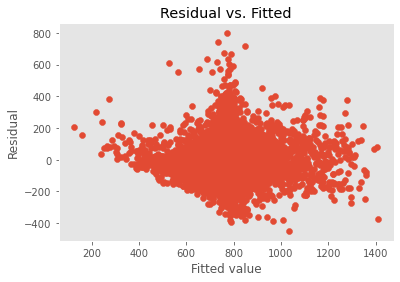

In [48]:
# residual plot

plt.scatter(model_1.fittedvalues, model_1.resid)
# adding title and labels
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted')
plt.show()

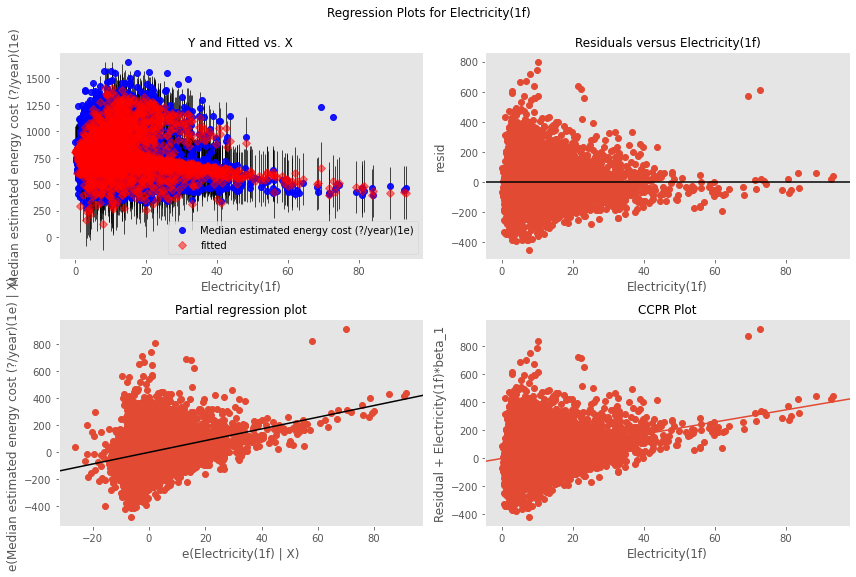

In [60]:
# residual analysis
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_1, 'Electricity(1f)', fig=fig)

In [ ]:
# now, since heat pump and Other or unknown accounts for very small proportion than the other 4 types,
# if we don't contain them in the model, what will happen
# 

In [49]:
# as before, first add a constant
Y1 = data1["Median estimated energy cost (?/year)(1e)"]
X4 = data1.loc[:,['Community heating scheme(1f)','Electricity(1f)','Oil(1f)_cbrt','Mains gas(1f)']]

X4 = sm.add_constant(X4)

model_8=sm.OLS(Y1,X4).fit()

model_8.summary()

# R square is similar to model_0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                       
=====================================================================================================
Dep. Variable:     Median estimated energy cost (?/year)(1e)   R-squared:                       0.459
Model:                                                   OLS   Adj. R-squared:                  0.459
Method:                                        Least Squares   F-statistic:                     1529.
Date:                                       Tue, 07 Dec 2021   Prob (F-statistic):               0.00
Time:                                               15:39:41   Log-Likelihood:                -45037.
No. Observations:                                       7201   AIC:                         9.008e+04
Df Residuals:                                           7196   BIC:                         9.012e+04
Df Model:                                                  4                                         
Covariance Type:                                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1355.7559     24.367     55.639      0.000    1307.989    1403.523
Community heating scheme(1f)   -13.2822      0.336    -39.536      0.000     -13.941     -12.624
Electricity(1f)                 -9.3092      0.317    -29.367      0.000      -9.931      -8.688
Oil(1f)_cbrt                    17.0903      3.391      5.039      0.000      10.442      23.738
Mains gas(1f)                   -5.5869      0.229    -24.378      0.000      -6.036      -5.138
==============================================================================
Omnibus:                      834.632   Durbin-Watson:                   1.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1781.433
Skew:                           0.717   Prob(JB):                         0.00
Kurtosis:                       4.970   Cond. No.                     1.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
# if no constant

Y1 = data1["Median estimated energy cost (?/year)(1e)"]
X4 = data1.loc[:,['Community heating scheme(1f)','Electricity(1f)','Oil(1f)_cbrt','Mains gas(1f)']]

#X4 = sm.add_constant(X4)

model_9=sm.OLS(Y1,X4).fit()

model_9.summary()

# R square is much higher but smaller than model_1, this is easy to understand because model_1 has 2 more variables than this

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Median estimated energy cost (?/year)(1e)   R-squared (uncentered):                   0.964
Model:                                                   OLS   Adj. R-squared (uncentered):              0.964
Method:                                        Least Squares   F-statistic:                          4.873e+04
Date:                                       Tue, 07 Dec 2021   Prob (F-statistic):                        0.00
Time:                                               15:40:37   Log-Likelihood:                         -46325.
No. Observations:                                       7201   AIC:                                  9.266e+04
Df Residuals:                                           7197   BIC:                                  9.269e+04
Df Model:                                                  4                                                  
Covariance Type:                                   nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Community heating scheme(1f)     1.4142      0.248      5.697      0.000       0.928       1.901
Electricity(1f)                  6.2554      0.178     35.085      0.000       5.906       6.605
Oil(1f)_cbrt                   186.4235      1.789    104.189      0.000     182.916     189.931
Mains gas(1f)                    7.0877      0.030    236.718      0.000       7.029       7.146
==============================================================================
Omnibus:                      778.621   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1572.157
Skew:                           0.693   Prob(JB):                         0.00
Kurtosis:                       4.821   Cond. No.                         83.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

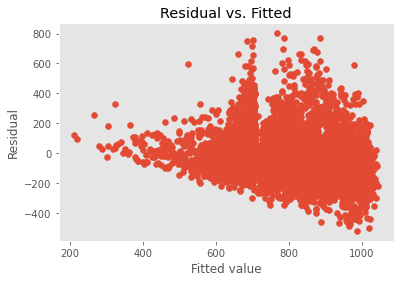

In [51]:
# check the residual
plt.scatter(model_9.fittedvalues, model_9.resid)
# adding title and labels
plt.xlabel('Fitted value')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted')
plt.show()

# not good as model_1

In [ ]:
# so I think model_1 is the best multi regression model to explain the relation between estimated energy cost and the 6 types of heating methods
# due to too many 0 in several independent variables, the data transformation is not satisfying and the models using those data are worse than the original ones 